In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_rows', None)
df = pd.read_csv('/Users/datascience/Desktop/Upwork/dataset.csv')
df.head()
df.shape

(569, 32)

In [2]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,568.000000,569.000000,569.000000,568.000000,566.000000,568.000000,567.000000,567.000000,567.000000,...,567.000000,568.000000,569.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.130245,19.289649,105.047821,654.229225,0.096248,0.104354,61.817244,0.048854,0.710289,...,16.276118,25.687271,107.261213,880.583128,0.132369,0.254265,0.271431,0.114606,0.290076,0.083946
std,1.250206e+08,3.526450,4.301036,312.218444,353.150358,0.013971,0.052858,1469.858104,0.038787,12.596692,...,4.840100,6.146996,33.602542,569.356993,0.022832,0.157336,0.208023,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,0.800000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.697500,16.170000,75.210000,419.900000,0.086130,0.064815,0.029570,0.020310,0.162000,...,13.010000,21.095000,84.110000,515.300000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460
50%,9.060240e+05,13.375000,18.840000,86.340000,548.750000,0.095825,0.092525,0.061550,0.033500,0.179300,...,14.970000,25.425000,97.660000,686.500000,0.131300,0.211900,0.226550,0.099930,0.282200,0.080040
75%,8.813129e+06,15.797500,21.800000,104.300000,784.150000,0.105250,0.130425,0.132000,0.073820,0.195800,...,18.800000,29.757500,125.400000,1084.000000,0.146000,0.339100,0.381400,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,7517.000000,2501.000000,0.163400,0.345400,35000.000000,0.201200,300.130000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                568 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  568 non-null float64
smoothness_mean            566 non-null float64
compactness_mean           568 non-null float64
concavity_mean             567 non-null float64
concave points_mean        567 non-null float64
symmetry_mean              567 non-null float64
fractal_dimension_mean     568 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               567 non-null float64
area_se                    567 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             0
area_mean                  1
smoothness_mean            3
compactness_mean           1
concavity_mean             2
concave points_mean        2
symmetry_mean              2
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               2
area_se                    2
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          2
symmetry_se                1
fractal_dimension_se       1
radius_worst               2
texture_worst              1
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df = df.dropna()

### Dropping the Null values

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

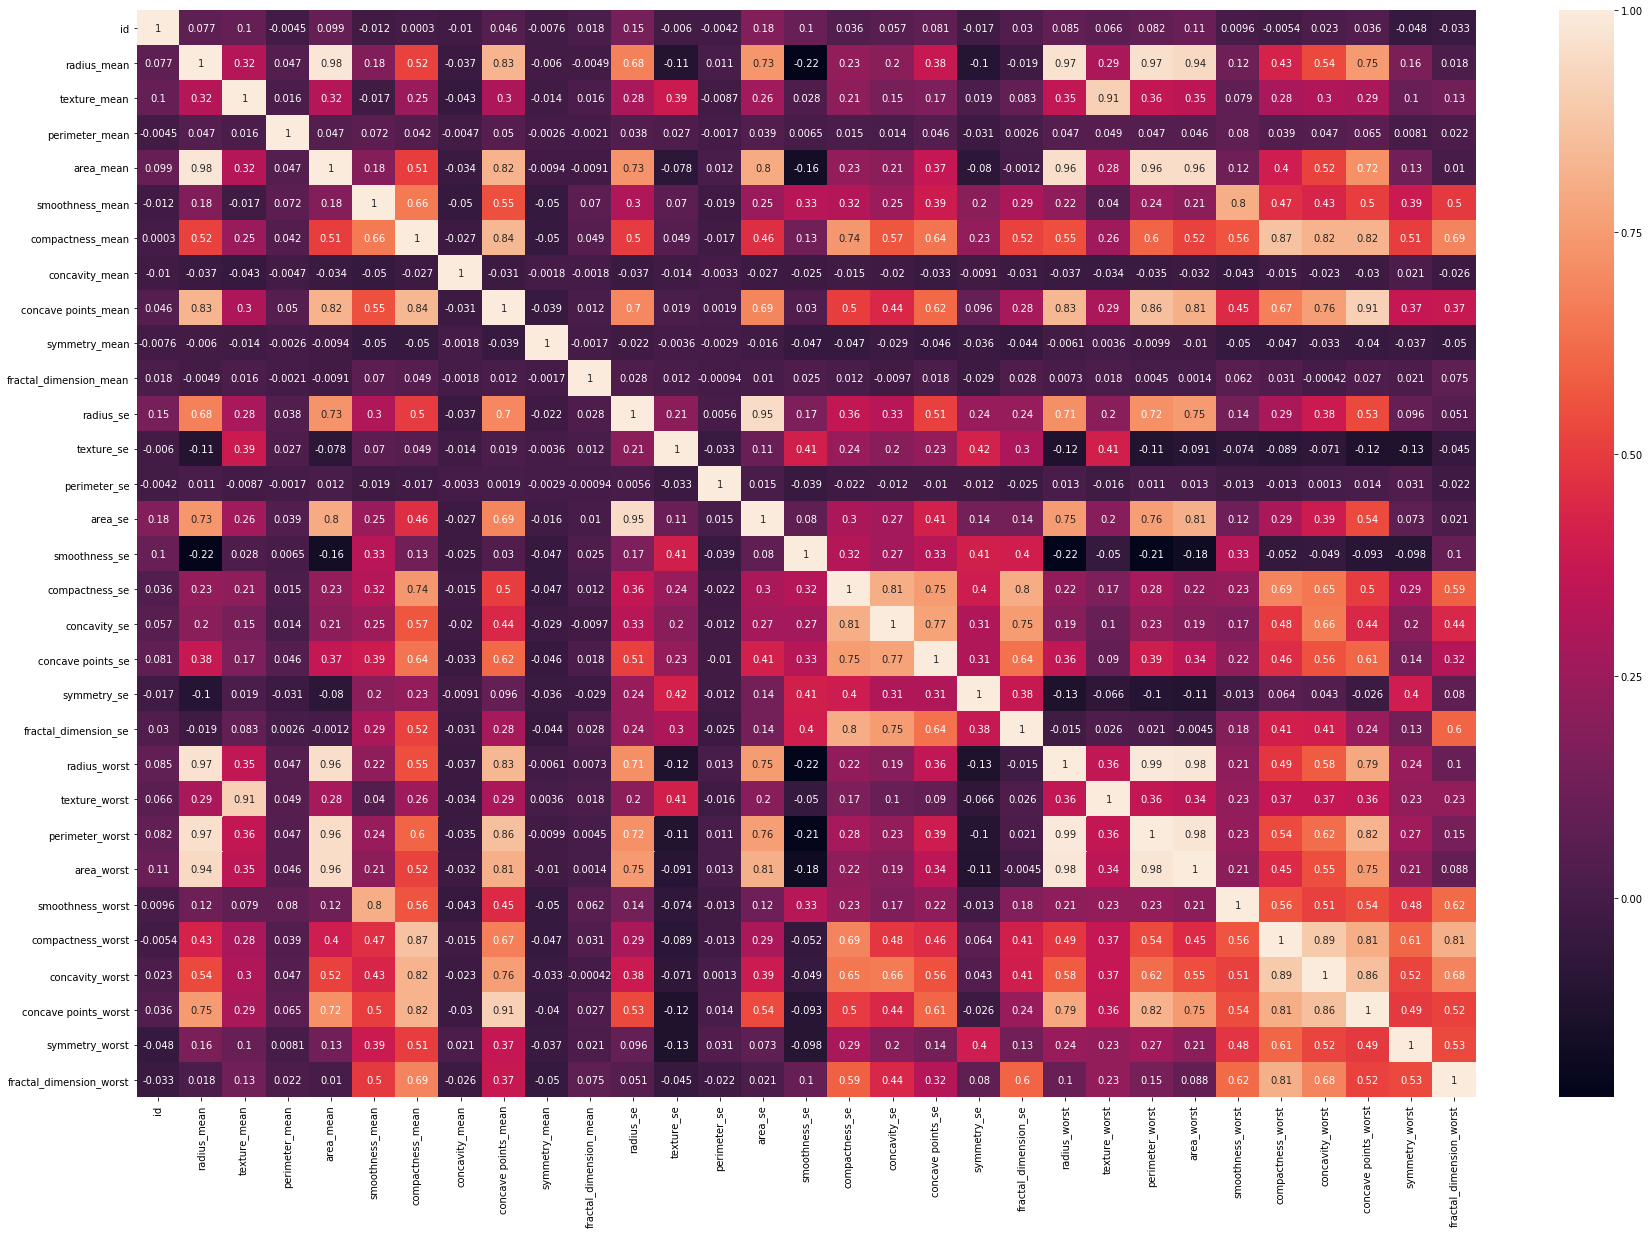

In [8]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

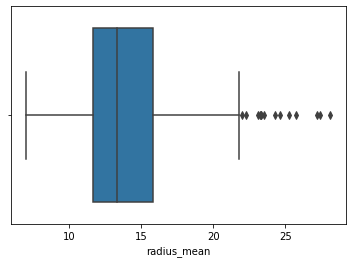

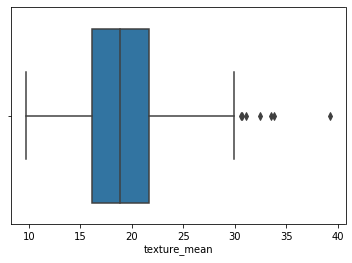

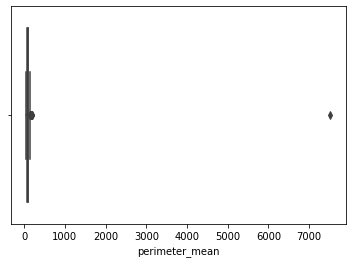

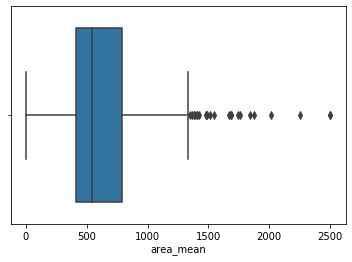

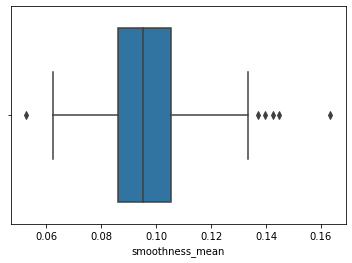

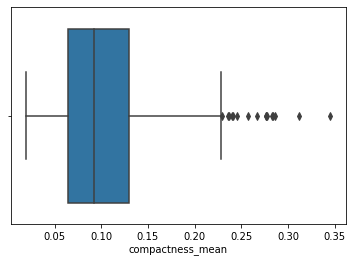

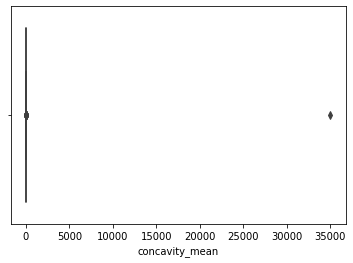

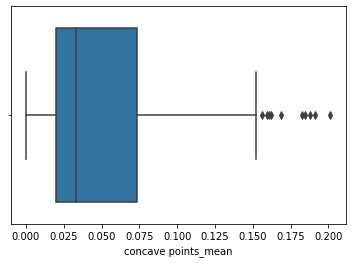

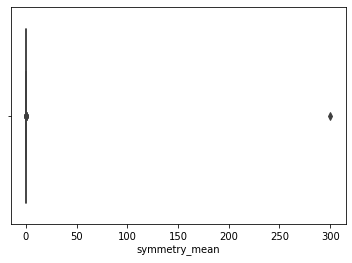

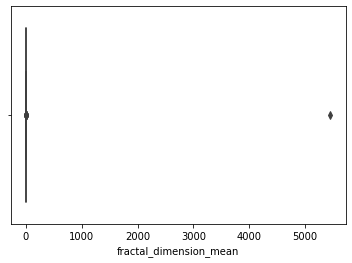

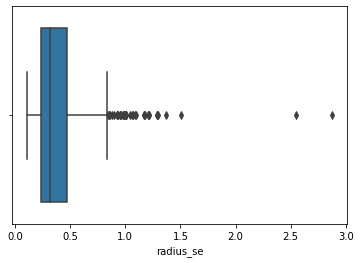

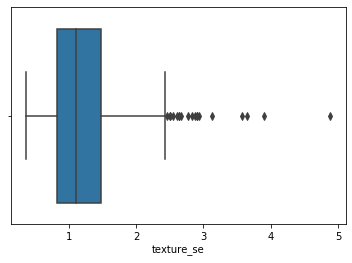

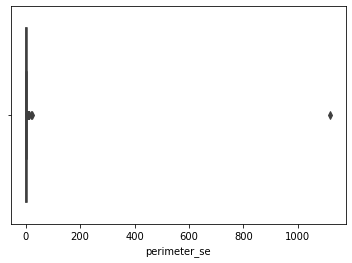

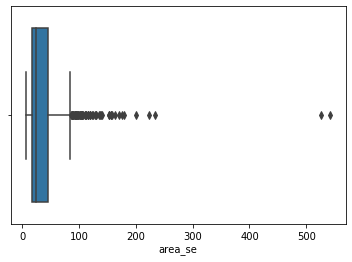

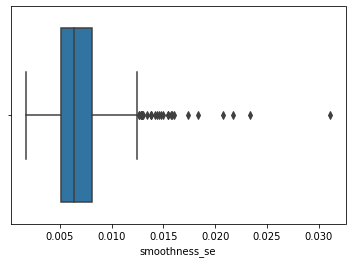

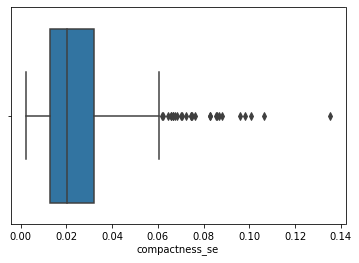

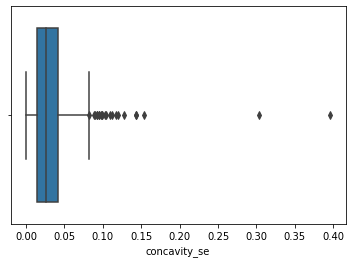

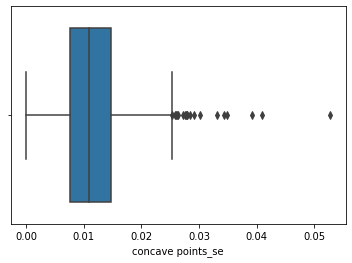

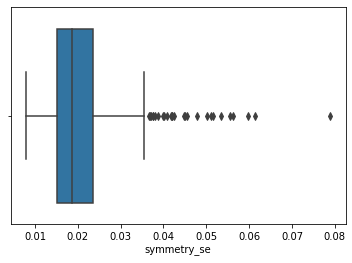

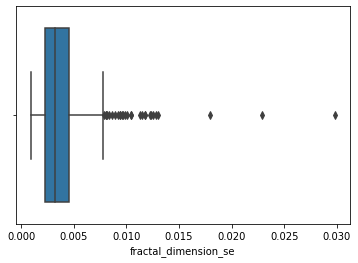

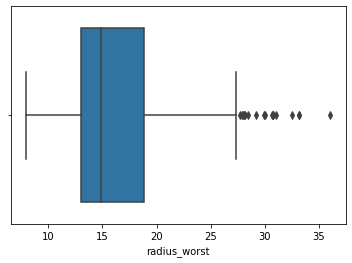

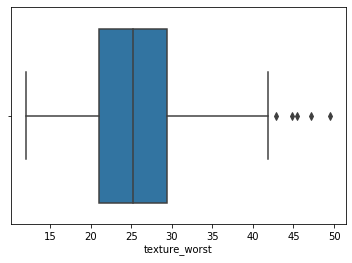

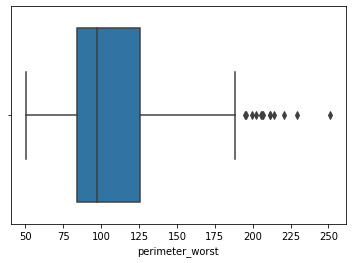

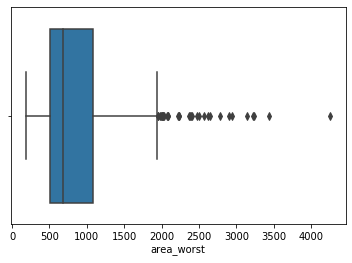

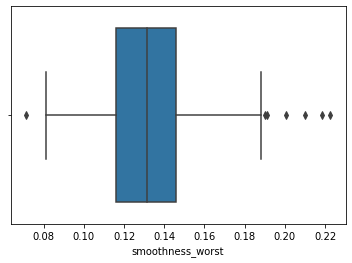

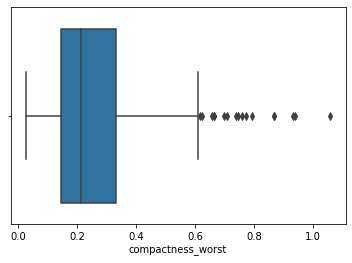

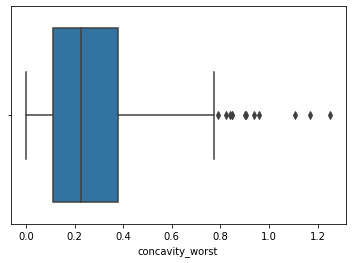

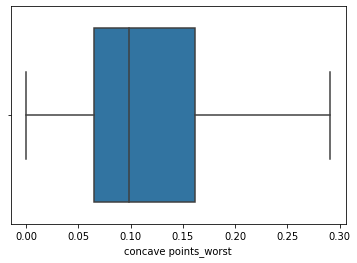

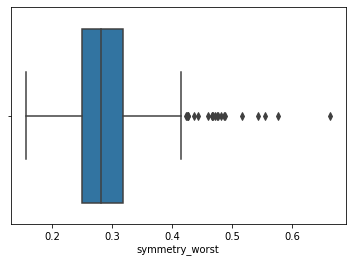

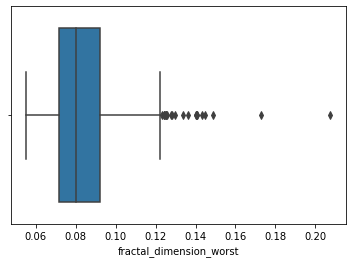

In [9]:
columns_check = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for i in columns_check:
    sns.boxplot(df[i])
    plt.show()

## Outlier Treatment

In [10]:
for i in columns_check:
    Q1 = df[i].quantile(0.10)
    Q3 = df[i].quantile(0.90)
    IQR = Q3 - Q1
    df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]

In [11]:
df.describe()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,M,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [12]:
df.shape

(517, 32)

In [13]:
df['diagnosis'] = np.where(df['diagnosis'].str.contains('M'),1,0)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,1,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,844359,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


### Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df.drop(['diagnosis','id'], axis = 1)

In [88]:
y = df['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [89]:
X_train, X_test,y_train,y_test = train_test_split(X,y , train_size = 0.8, test_size= 0.2, random_state = 100)

## Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
col1 = X_train.columns 
X_train[col1] = scaler.fit_transform(X_train[col1])
#X_train = scaler.fit_transform(X_train)
type(X_train)
#col1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

pandas.core.frame.DataFrame

### Using Cross Validation

In [92]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 31))}]


# step-3: perform grid search
# 3.1 specify model
lr = LogisticRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver

Fitting 5 folds for each of 30 candidates, totalling 150 fits


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='warn',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='warn',
                          

### Comparing the performance with different features

In [93]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069281,0.006975,0.001339,0.000127,1,{'n_features_to_select': 1},0.725529,0.647879,0.647879,0.944781,...,0.725254,0.112991,30,0.697718,0.730843,0.690469,0.632630,0.699329,0.690198,0.031956
1,0.071574,0.011360,0.001709,0.000559,2,{'n_features_to_select': 2},0.780423,0.547273,0.748485,0.944781,...,0.736286,0.131625,27,0.829145,0.757759,0.811590,0.803195,0.803910,0.801120,0.023611
2,0.062465,0.000899,0.001551,0.000316,3,{'n_features_to_select': 3},0.835317,0.547273,0.698182,0.944781,...,0.726027,0.146118,29,0.842288,0.744301,0.838506,0.816315,0.830055,0.814293,0.036115
3,0.066432,0.003579,0.001492,0.000527,4,{'n_features_to_select': 4},0.780423,0.748485,0.597576,0.944781,...,0.735214,0.127672,28,0.802860,0.838506,0.851964,0.803195,0.830055,0.825316,0.019494
4,0.077107,0.009533,0.002064,0.000688,5,{'n_features_to_select': 5},0.835317,0.849091,0.899394,0.944781,...,0.815938,0.138174,26,0.881716,0.905795,0.905795,0.842556,0.843128,0.875798,0.028309


### Getting Optimal Value of Hyperparamter (Number of features)

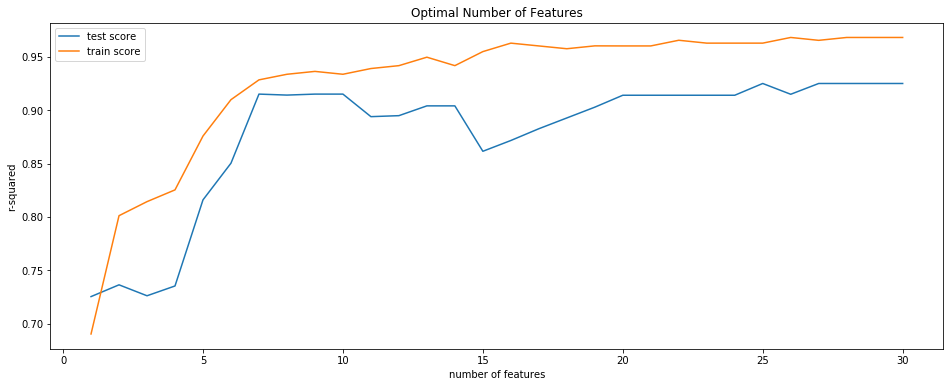

In [94]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## Training Model with appropriate Hyperparamter 

In [95]:
n_features_optimal = 7

lr = LogisticRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, n_features_optimal)
rfe.fit(X_train, y_train)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

## Performing RFE

In [96]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False, False])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('radius_mean', False, 14),
 ('texture_mean', False, 15),
 ('perimeter_mean', False, 4),
 ('area_mean', False, 3),
 ('smoothness_mean', False, 23),
 ('compactness_mean', False, 18),
 ('concavity_mean', True, 1),
 ('concave points_mean', False, 8),
 ('symmetry_mean', False, 22),
 ('fractal_dimension_mean', False, 10),
 ('radius_se', False, 7),
 ('texture_se', False, 16),
 ('perimeter_se', False, 11),
 ('area_se', False, 2),
 ('smoothness_se', False, 17),
 ('compactness_se', False, 6),
 ('concavity_se', False, 19),
 ('concave points_se', False, 24),
 ('symmetry_se', False, 20),
 ('fractal_dimension_se', False, 12),
 ('radius_worst', True, 1),
 ('texture_worst', True, 1),
 ('perimeter_worst', True, 1),
 ('area_worst', True, 1),
 ('smoothness_worst', True, 1),
 ('compactness_worst', False, 21),
 ('concavity_worst', False, 5),
 ('concave points_worst', True, 1),
 ('symmetry_worst', False, 9),
 ('fractal_dimension_worst', False, 13)]

## Selecting the Features based on RFE

In [98]:
col = X_train.columns[rfe.support_]
col

Index(['concavity_mean', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'concave points_worst'],
      dtype='object')

In [99]:
X_train = X_train[col]
y_train.head(20)
X_train.head()

,concavity_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concave points_worst
460,0.211013,1.404158,1.425585,1.341899,1.401446,1.268215,0.631655
373,0.903029,1.906651,-0.382937,1.779812,1.940657,1.095728,1.464598
472,-0.391972,0.199009,-1.173766,0.147322,0.059931,-1.160219,0.021527
433,0.992192,1.341607,0.856827,1.139328,1.320021,0.314998,0.860452
183,-0.306535,-0.803892,-1.256843,-0.832172,-0.735134,-0.906027,-0.752198


### Performing Manual tunning of Features based on p value and RFE 

## Iteration 1

In [100]:
X_train_sm = sm.add_constant(X_train)
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log.fit()
res.summary()


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  413
Model:                            GLM   Df Residuals:                      405
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        10:17:10   Pearson chi2:                     45.6
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4122      1.577     -0.261      0.794      -3.503       2.679
concavity_mean           1.9265      1.372      1.405      0.160      -0.762       4.615
radius_worst             2.3501     10.592      0.222      0.824     -18.409      23.109
texture_worst            3.1154      0.954      3.265      0.001       1.245       4.986
perimeter_worst          0.8000      7.548      0.106      0.916     -13.994      15.594
area_worst              11.9148     12.139      0.982      0.326     -11.877      35.707
smoothness_worst         2.8568      1.067      2.677      0.007       0.765       4.949
concave points_worst     2.7997      2.034      1.377      0.169      -1.186       6.786
========================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,radius_worst,143.46
3,perimeter_worst,130.34
4,area_worst,45.91
6,concave points_worst,9.66
0,concavity_mean,6.00
5,smoothness_worst,1.85
2,texture_worst,1.20


In [102]:
col = col.drop('perimeter_worst')

## Iteration 2

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  413
Model:                            GLM   Df Residuals:                      406
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        10:17:10   Pearson chi2:                     45.0
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3684      1.510     -0.244      0.807      -3.328       2.591
concavity_mean           1.9474      1.353      1.439      0.150      -0.705       4.600
radius_worst             2.6797     10.015      0.268      0.789     -16.948      22.308
texture_worst            3.1069      0.949      3.274      0.001       1.247       4.967
area_worst              12.3842     11.197      1.106      0.269      -9.562      34.330
smoothness_worst         2.8461      1.067      2.666      0.008       0.754       4.938
concave points_worst     2.8494      1.981      1.438      0.150      -1.034       6.733
========================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,radius_worst,55.68
3,area_worst,45.34
5,concave points_worst,9.16
0,concavity_mean,5.12
4,smoothness_worst,1.77
2,texture_worst,1.20


In [105]:
col = col.drop('radius_worst')

## Iteration 3

In [106]:
logm3 = sm.GLM(y_train,X_train[col], family = sm.families.Binomial())
res = logm3.fit()
res.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  413
Model:                            GLM   Df Residuals:                      408
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        10:17:10   Pearson chi2:                     44.1
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
concavity_mean           1.9759      1.221      1.619      0.106      -0.417       4.368
texture_worst            3.0396      0.887      3.426      0.001       1.300       4.779
area_worst              15.2280      4.095      3.719      0.000       7.203      23.253
smoothness_worst         2.7960      0.987      2.832      0.005       0.861       4.731
concave points_worst     2.8848      1.649      1.750      0.080      -0.347       6.116
========================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,concave points_worst,6.82
0,concavity_mean,5.01
2,area_worst,3.07
3,smoothness_worst,1.56
1,texture_worst,1.20


In [108]:
col = col.drop('concavity_mean')

## Iteration 4

In [109]:
X_train = X_train[col]
logm3 = sm.GLM(y_train,X_train[col], family = sm.families.Binomial())
res = logm3.fit()
res.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
//anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  413
Model:                            GLM   Df Residuals:                      409
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        10:17:10   Pearson chi2:                     44.7
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
texture_worst            3.0872      0.824      3.745      0.000       1.471       4.703
area_worst              15.8047      3.892      4.061      0.000       8.176      23.434
smoothness_worst         2.8772      0.933      3.085      0.002       1.049       4.705
concave points_worst     3.6177      1.443      2.507      0.012       0.789       6.446
========================================================================================
"""

## Running the model on Train dataset

In [110]:
y_train_pred = res.predict(X_train)

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.00000000e+00, 1.00000000e+00, 2.63354576e-03, 1.00000000e+00,
       9.01627762e-10, 2.34822498e-03, 2.45160091e-09, 5.73094060e-09,
       4.78168544e-06, 1.00608781e-03])

In [112]:
y_train_pred_final = pd.DataFrame({'diagnosis':y_train.values, 'diagnosis_prob':y_train_pred})
y_train_pred_final['Id'] = y_train.index
y_train_pred_final.head()

,diagnosis,diagnosis_prob,Id
0,1,1.000000e+00,460
1,1,1.000000e+00,373
2,0,2.633546e-03,472
3,1,1.000000e+00,433
4,0,9.016278e-10,183


### Adding Optimized cut off value to the Probabilities 

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.diagnosis_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head

y_train_pred_final.head(20)

,diagnosis,diagnosis_prob,Id,predicted
0,1,1.000000e+00,460,1
1,1,1.000000e+00,373,1
2,0,2.633546e-03,472,0
3,1,1.000000e+00,433,1
4,0,9.016278e-10,183,0
5,0,2.348225e-03,500,0
6,0,2.451601e-09,153,0
7,0,5.730941e-09,341,0
8,0,4.781685e-06,534,0
9,0,1.006088e-03,559,0


## Model Evaluation

In [115]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.diagnosis, y_train_pred_final.predicted )
print(confusion)

[[263   4]
 [  3 143]]


In [116]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.diagnosis, y_train_pred_final.predicted))

0.9830508474576272


## Drawing the ROC Curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.diagnosis, y_train_pred_final.diagnosis_prob, drop_intermediate = False )

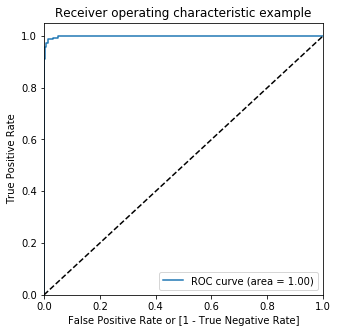

In [119]:
draw_roc(y_train_pred_final.diagnosis, y_train_pred_final.diagnosis_prob)

## Making predictions on the Test Data Set

In [120]:
X_test.head()
X_test[col1] = scaler.fit_transform(X_test[col1])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


In [121]:
X_test  = X_test[col]

In [122]:
y_test_pred = res.predict(X_test)

In [123]:
type(y_test_pred)

pandas.core.series.Series

In [132]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
252,1.000000e+00
297,1.491847e-07
171,9.994595e-01
182,1.000000e+00
292,4.158265e-05


In [134]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,diagnosis
252,1
297,1
171,1
182,1
292,0


In [135]:
y_test_df['id'] = y_test_df.index

In [127]:
#y_pred_1.reset_index(drop=True, inplace=True)
#y_test_df.reset_index(drop=True, inplace=True)

In [170]:
y_pred_final = pd.concat([y_pred_1,y_test_df],axis=1)
y_pred_final.head()

,0,diagnosis,id
252,1.000000e+00,1,252
297,1.491847e-07,1,297
171,9.994595e-01,1,171
182,1.000000e+00,1,182
292,4.158265e-05,0,292


In [171]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'diag_prob'})
y_pred_final.head()

,diag_prob,diagnosis,id
252,1.000000e+00,1,252
297,1.491847e-07,1,297
171,9.994595e-01,1,171
182,1.000000e+00,1,182
292,4.158265e-05,0,292


In [172]:
y_pred_final.head()

,diag_prob,diagnosis,id
252,1.000000e+00,1,252
297,1.491847e-07,1,297
171,9.994595e-01,1,171
182,1.000000e+00,1,182
292,4.158265e-05,0,292


In [174]:
y_pred_final = y_pred_final.set_index('id')

In [175]:
y_pred_final.head()

,diag_prob,diagnosis
id,,
252,1.000000e+00,1
297,1.491847e-07,1
171,9.994595e-01,1
182,1.000000e+00,1
292,4.158265e-05,0


In [176]:
y_pred_final['final_predicted'] = y_pred_final.diag_prob.map(lambda x: 1 if x > 0.5 else 0)

In [177]:
y_pred_final.head()

,diag_prob,diagnosis,final_predicted
id,,,
252,1.000000e+00,1,1
297,1.491847e-07,1,0
171,9.994595e-01,1,1
182,1.000000e+00,1,1
292,4.158265e-05,0,0


### Calcuating Accuracy, Precision, Recall on the Test Data Set

In [179]:
#Accuracy
metrics.accuracy_score(y_pred_final.diagnosis, y_pred_final.final_predicted)

0.9519230769230769

In [180]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.diagnosis, y_pred_final.final_predicted )
confusion2

array([[62,  2],
       [ 3, 37]])

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Calculate Precision

TP/(TP+FP)

0.9487179487179487

In [184]:
# Calculate Recall

TP/(TP+FN)

0.925